In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from src import loading, metrics, modeling, preprocessing, resampling, evaluation, explainability

from datetime import datetime

In [3]:
df = loading.load_data()

In [4]:
X_train, X_val, X_test, y_train, y_val = preprocessing.preprocess_data(df)

7955289it [00:41, 191848.77it/s]


In [5]:
X_train_resample, y_train_resample = resampling.resample_data(X_train,y_train)

In [6]:
model = modeling.fit_model(X_train_resample,y_train_resample)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [7]:
model = modeling.load_model()

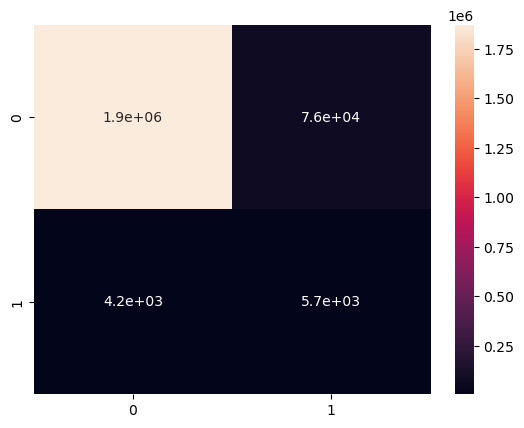

In [8]:
evaluation.evaluate_model(model,X_val,y_val)

In [9]:
#explainability.explain_model(model,X_test)

In [11]:
model

GradientBoostingClassifier(max_features='sqrt', subsample=0.5)

In [12]:
import shap
N = 10000
X = X_train

explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X[:N])

Exception: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 2038477861642928111777141024875516554754664274329600.000000, while the model output was 2038477861642923791786154723898929617381718363209728.000000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:

index = np.random.randint(0,N)
shap.initjs()
shap.force_plot(explainer_shap.expected_value, shap_values[index,:], X.iloc[index,:])